In [9]:
import pandas as pd

df = pd.read_csv('CSVs\DevProcesoFormatoTipoSoloAbril.csv', encoding='utf-8',)

df

,folio_recepcion,descripcion,fecha_visacion
0,2024089008,FALTA COTIZ. SALUD,2024-04-02 00:00:00.000
1,2024465698,COTIZ < LIQ DE SUELDO,2024-04-08 00:00:00.000
2,2024482134,NO HAY IMAGENES PARA DESCARGAR,2024-04-10 00:00:00.000
3,2024472066,NO IMAGENES CON API,2024-04-10 00:00:00.000
4,2024475450,COTIZ < LIQ DE SUELDO,2024-04-10 00:00:00.000
...,...,...,...
2692,2024456529,NO PROCESADO MEDIPASS,2024-04-01 00:00:00.000
2693,2024472444,NO IMAGENES CON API,2024-04-10 00:00:00.000
2694,2024479168,NO PROCESADO MEDIPASS,2024-04-04 00:00:00.000
2695,2024465615,NO IMAGENES CON API,2024-04-03 00:00:00.000


In [ ]:
df['descripcion'].unique()

In [10]:


# Convertir la columna fecha_visacion a tipo datetime
df['fecha_visacion'] = pd.to_datetime(df['fecha_visacion'])

df['fecha_visacion'] = df['fecha_visacion'].dt.to_period('M')

# Reemplazar NaN en la columna 'descripcion' con la cadena "procesados"
#df['descripcion'].fillna("PROCESADOS NO DEVUELTOS", inplace=True)

# Contar la cantidad de errores por fecha
error_count_by_date = df.groupby(['fecha_visacion', 'descripcion']).count().unstack(fill_value=0).reset_index()

# Aplicar el filtro para seleccionar solo las filas a partir de agosto de 2023
error_count_by_date = error_count_by_date[error_count_by_date['fecha_visacion'] >= '2023-08']

error_count_by_date

fecha_visacion       folio_recepcion                     \
descripcion                COTIZ < LIQ DE SUELDO FALTA COTIZ. SALUD   
0                  2024-04                   517                279   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
0                                                            5               

                                                                \
descripcion NO HAY IMAGENES PARA DESCARGAR NO IMAGENES CON API   
0                                       96                 559   

                                                              \
descripcion NO PROCESADO MEDIPASS NO SE ENCUENTRA CODIGO AFP   
0                            1172                          1   

                                                                     
descripcion NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS RENTA = TOPE  
0                                                    3           65

In [11]:

# Agregar una columna que indique la suma de los errores por fecha
error_count_by_date['TOTAL_PUBLICADOS'] = error_count_by_date.iloc[:, 1:].sum(axis=1)

error_percentages = error_count_by_date.copy()
for col in error_percentages.columns[1:-1]:
    error_percentages[col] = (error_percentages[col] / error_percentages['TOTAL_PUBLICADOS']) * 100


error_percentages

fecha_visacion       folio_recepcion                     \
descripcion                COTIZ < LIQ DE SUELDO FALTA COTIZ. SALUD   
0                  2024-04             19.169448          10.344828   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
0                                                     0.185391               

                                                                \
descripcion NO HAY IMAGENES PARA DESCARGAR NO IMAGENES CON API   
0                                 3.559511           20.726733   

                                                              \
descripcion NO PROCESADO MEDIPASS NO SE ENCUENTRA CODIGO AFP   
0                       43.455692                   0.037078   

                                                                     \
descripcion NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS RENTA = TOPE   
0                                             0.111235     2.410085   

            TOTAL_PUBLICADOS  
descripcion                   
0                       2697

Reemplaza las columnas de eror_percentages

In [12]:

# Mostrar el resultadodf
#error_percentages.set_index('date', inplace=True)

#Con todos los errores
error_percentages.columns = [
    'date',
    'COTIZ < LIQ DE SUELDO',
    'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'SOBRE 60 ANIOS SIN PENSION',#nuevo
    'TOTAL_errores']

#Errores seleccionados



error_percentages

ValueError: Length mismatch: Expected axis has 11 elements, new values have 14 elements

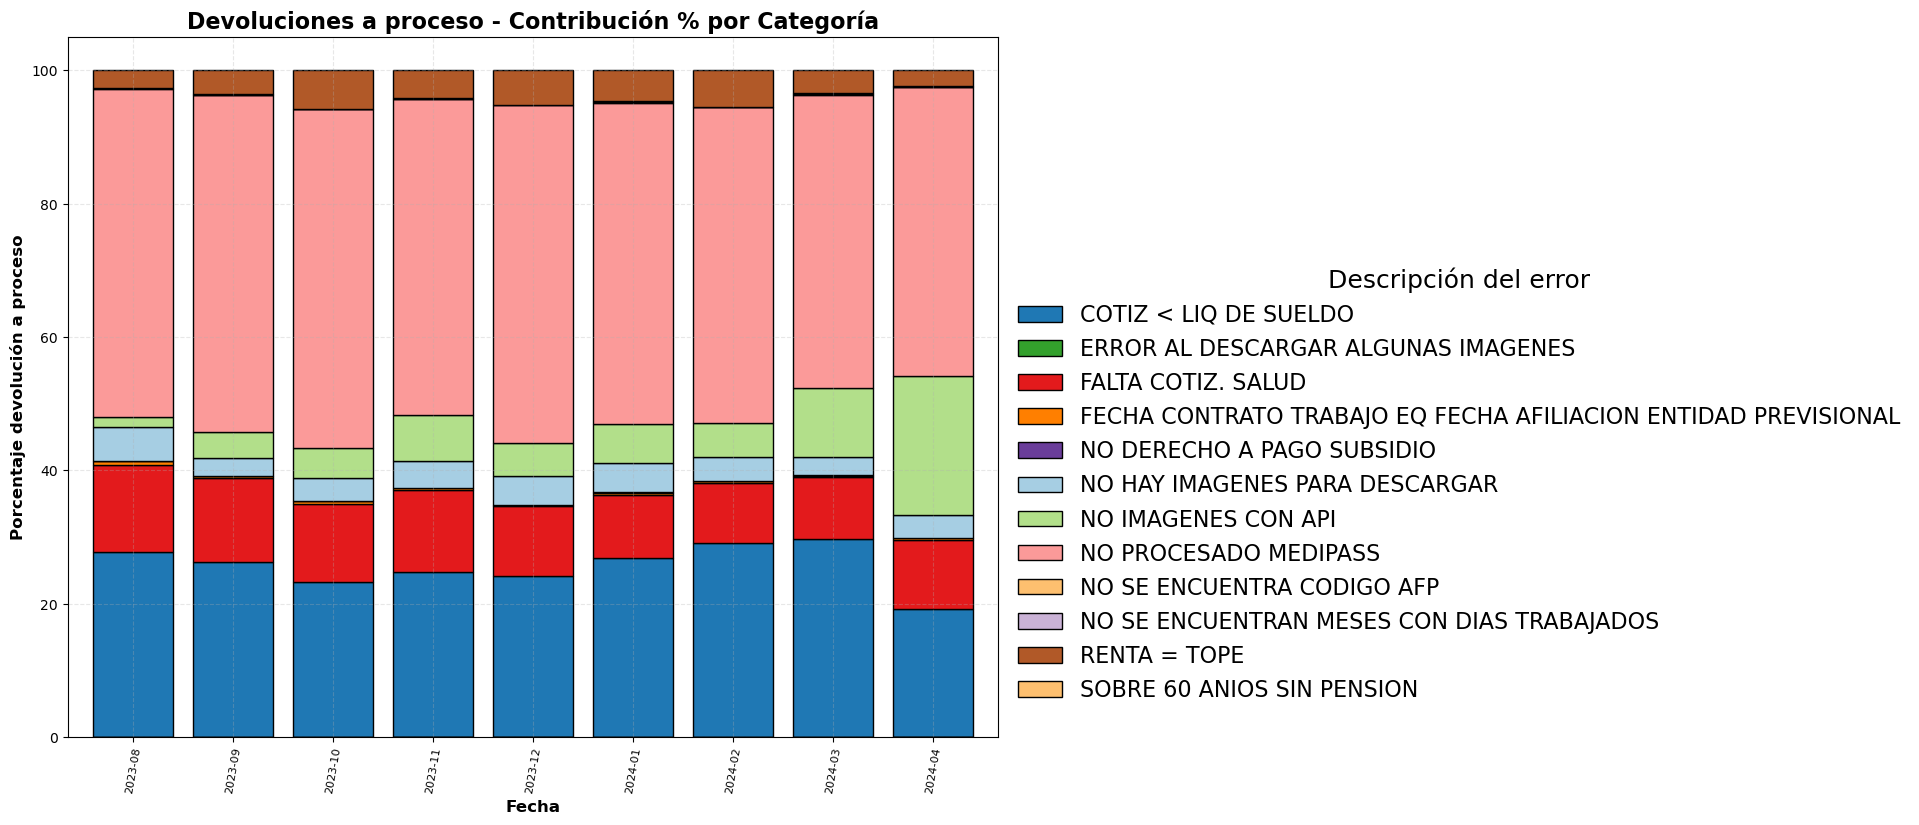

In [8]:
import matplotlib.pyplot as plt

from matplotlib.patches import PathPatch
from matplotlib.path import Path
#error_percentages['date'] = pd.to_datetime(error_percentages['date'])

columnas_grafica = [
    'date',
    'COTIZ < LIQ DE SUELDO',
    'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'SOBRE 60 ANIOS SIN PENSION'#nuevo
    ]



colores_distintivos = {
    'COTIZ < LIQ DE SUELDO': '#1f78b4',
    'ERROR AL DESCARGAR ALGUNAS IMAGENES': '#33a02c',
    'FALTA COTIZ. SALUD': '#e31a1c',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': '#ff7f00',
    'NO DERECHO A PAGO SUBSIDIO': '#6a3d9a',
    'NO HAY IMAGENES PARA DESCARGAR': '#a6cee3',
    'NO IMAGENES CON API': '#b2df8a',
    'NO PROCESADO MEDIPASS': '#fb9a99',
    'NO SE ENCUENTRA CODIGO AFP': '#fdbf6f',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS': '#cab2d6',
    'RENTA = TOPE': '#b15928',
    'SOBRE 60 ANIOS SIN PENSION': '#fdbf6f'
}
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold')
plt.legend(title='Descripción del error', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=16, title_fontsize=18, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
#ax.set_facecolor('lightgray')
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=80)

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.005)

plt.tick_params(axis='x', labelsize=8)

plt.show()

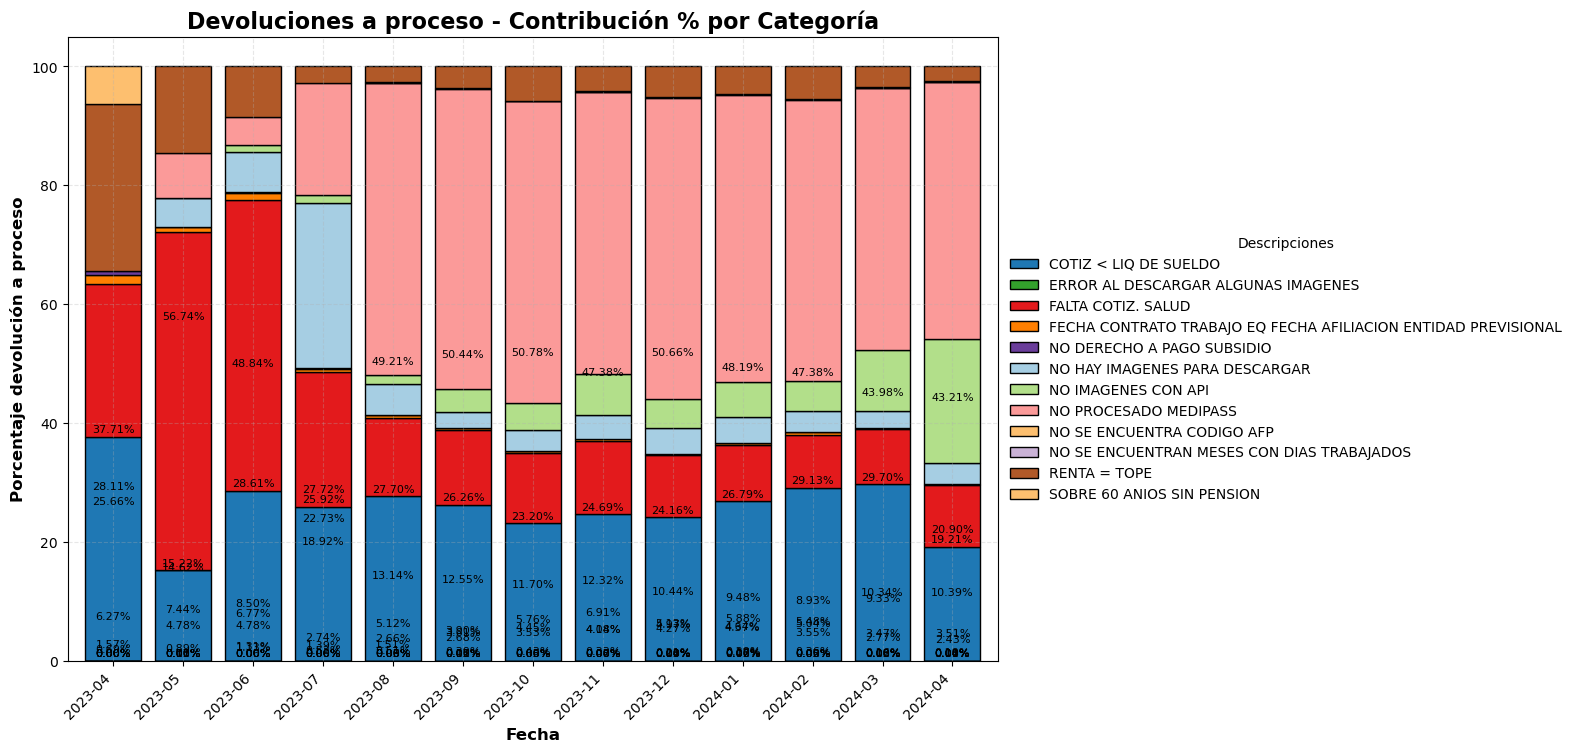

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold', loc='center')  # Alinea el título al centro
plt.legend(title='Descripciones', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=10, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=45, ha='right')  # Ajusta la rotación y alineación de las etiquetas del eje x
plt.yticks(fontsize=10)  # Aumenta el tamaño de la fuente en el eje y

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.1)

# Añadir etiquetas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

Este no duncion... Todavia


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tu DataFrame
data = {'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'COTIZ < LIQ DE SUELDO': [10, 15, 8],
        'FALTA COTIZ. SALUD': [5, 12, 7],
        'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': [8, 10, 15],
        'NO HAY IMAGENES PARA DESCARGAR': [20, 18, 25],
        'NO IMAGENES CON API': [12, 15, 10],
        'NO PROCESADO MEDIPASS': [8, 5, 12],
        'NO SE ENCUENTRA CODIGO AFP': [5, 8, 10],
        'RENTA = TOPE': [15, 20, 18],
        'TOTAL_errores': [5, 8, 10]}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Calcular porcentajes solo para columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
porcentajes_errores = df[columnas_numericas].div(df['TOTAL_errores'], axis=0) * 100

# Paleta de colores distintiva
colores_distintivos = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99']

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar barras agrupadas con la paleta de colores distintivos y patrones
ax = porcentajes_errores.plot(kind='bar', stacked=True, color=colores_distintivos, edgecolor='black', width=0.7)

# Asignar patrones diferentes a cada categoría
patrones_colores = ['/', '\\', '|', '-', '+', 'x', 'o', '*']
for i, (colname, hatch) in enumerate(zip(porcentajes_errores.columns, patrones_colores)):
    for bar in ax.patches[i::len(porcentajes_errores.columns)]:
        bar.set_hatch(hatch)

# Cambiar el tamaño de las etiquetas del eje x
plt.xticks(range(len(df['date'])), df['date'].dt.strftime('%Y-%m-%d'), rotation=45, fontsize=10)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Errors by Category (Sorted by Percentage)')
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=10, frameon=False)

plt.show()

